In [4]:
import nltk
from collections import Counter

f = open('../Output/tokens.txt', 'r')
outputFile = open('../Output/pos_tags.txt', 'a')
all_tokens = list()

for line in f.readlines():
    for word in line.split():
        all_tokens.append(word)

pos_tags = nltk.pos_tag(all_tokens)

counts = Counter(tag for word, tag in pos_tags)
print(counts)

#histogram for freq/pos

#nouns, verbs, adverbs, adjs
#make histograms for each pos top 10 words

Counter({'NN': 740420, 'IN': 517002, 'DT': 383910, 'PRP': 363261, 'JJ': 337014, 'VB': 290301, 'VBP': 266964, 'RB': 237180, 'NNP': 230976, 'CC': 212145, 'PRP$': 209907, 'NNS': 174045, 'TO': 166623, 'VBG': 140892, 'VBZ': 112626, 'MD': 52641, 'VBN': 50454, 'RP': 26910, 'CD': 26496, 'WRB': 22746, '.': 22329, 'JJR': 21216, 'VBD': 20247, 'WDT': 18594, ',': 18396, 'WP': 16476, 'RBR': 10182, 'EX': 7257, 'JJS': 6120, 'POS': 5667, 'PDT': 5388, ':': 4593, 'RBS': 1737, "''": 1101, '(': 870, ')': 870, 'FW': 825, '``': 519, 'NNPS': 195, 'UH': 123, 'WP$': 45, '$': 30, 'SYM': 6, '#': 6})


In [43]:
pos_dict = dict()

for tuple in pos_tags:
    if tuple[1] in pos_dict:
        specific_pos = pos_dict.get(tuple[1])
        specific_pos.append(tuple[0])
        pos_dict[tuple[1]] = specific_pos
    else:
        specific_pos = list()
        specific_pos.append(tuple[0])
        pos_dict[tuple[1]] = specific_pos

top_pos_words = dict()

for key, value in pos_dict.items():
    item_list = list()
    top_pos_words[key] = Counter(value).most_common(10)
print(top_pos_words)

{'NN': [('body', 36450), ('breath', 22983), ('i', 19521), ('mind', 18891), (']', 18837), ('moment', 15213), ('life', 13269), ('energy', 12072), ('time', 11496), ('way', 10392)], 'TO': [('to', 166221), ('na', 213), ('To', 189)], 'POS': [("'s", 5640), ('youhello', 27)], 'JJ': [('[', 20943), ('deep', 10242), ('present', 6954), ('positive', 6111), ('i', 5760), ('healthy', 5142), ('light', 4944), ('few', 4818), ('open', 4752), ('comfortable', 4632)], 'IN': [('of', 108726), ('in', 67119), ('as', 42639), ('with', 39207), ('for', 33615), ('that', 28287), ('into', 24423), ('on', 21549), ('from', 17109), ('through', 12411)], 'VBG': [('being', 7227), ('feeling', 5634), ('healing', 4716), ('letting', 4098), ('moving', 3666), ('allowing', 3333), ('breathing', 2988), ('relaxing', 2478), ('going', 2394), ('taking', 2313)], 'CC': [('and', 183249), ('or', 20502), ('but', 4527), ('And', 2850), ('either', 237), ('nor', 177), ('But', 162), ('Or', 102), ('&', 78), ('So', 48)], 'VBP': [('am', 41877), ('are'

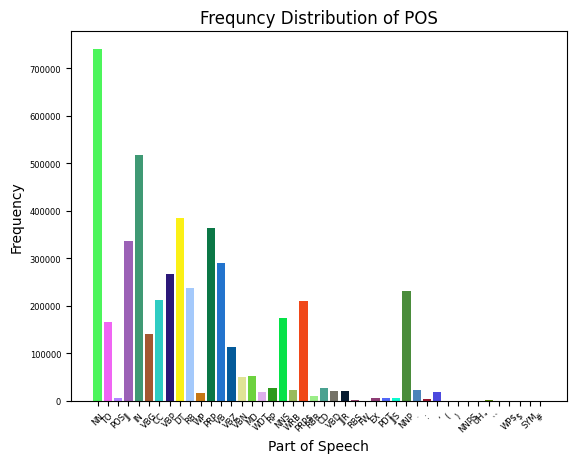

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import colorsys

fig = plt.figure()
col = (np.random.random(), np.random.random(), np.random.random())
plt.bar(counts.keys(), height=counts.values(), color=np.random.rand(len(counts),3))
plt.xticks(rotation=45)
plt.tick_params(labelsize=6)
plt.xlabel("Part of Speech")
plt.ylabel("Frequency")
plt.title("Frequncy Distribution of POS")
plt.show()

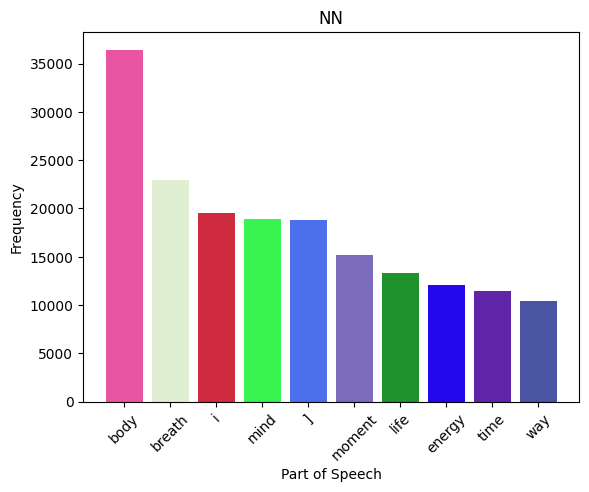

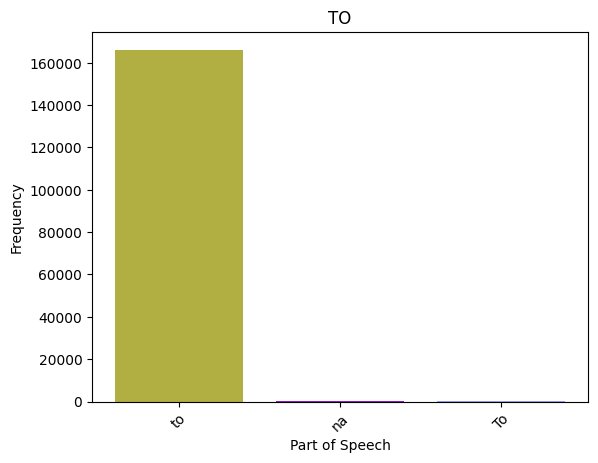

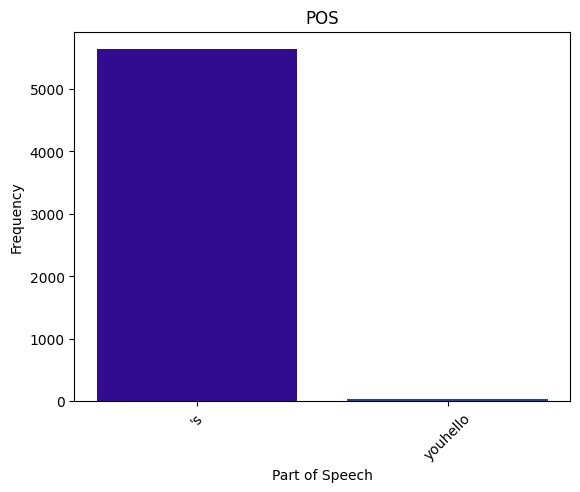

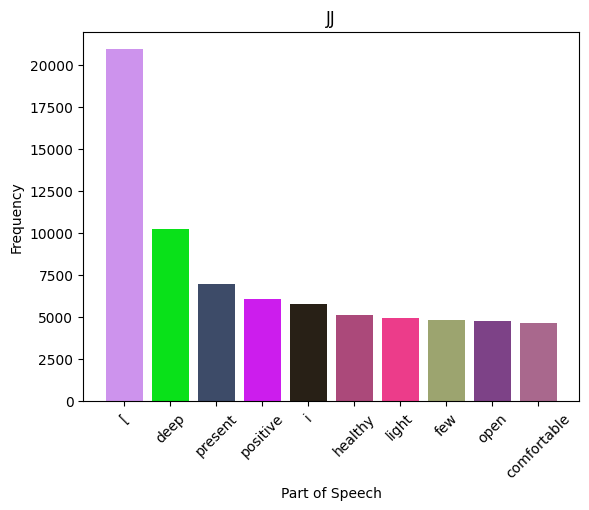

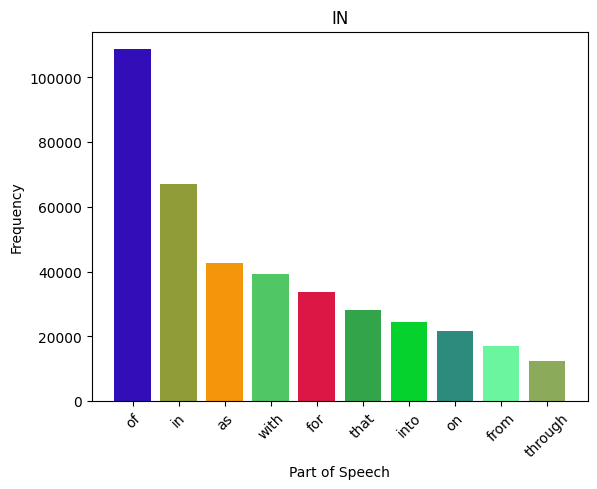

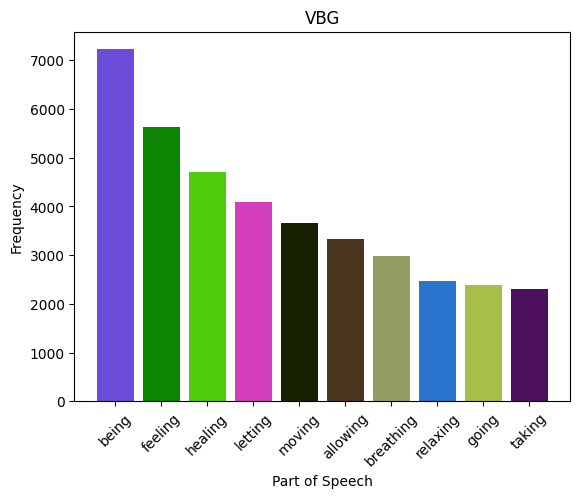

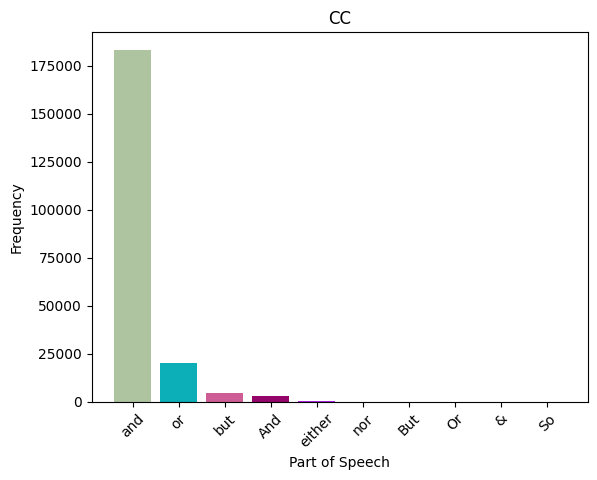

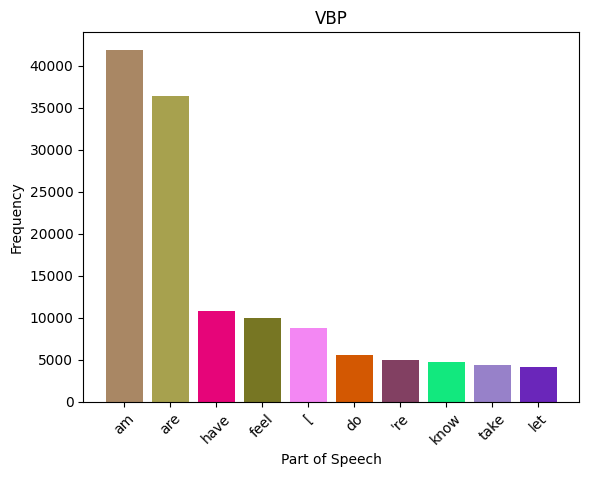

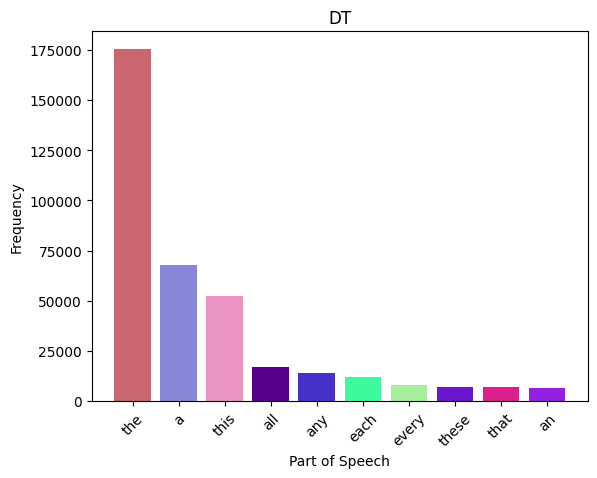

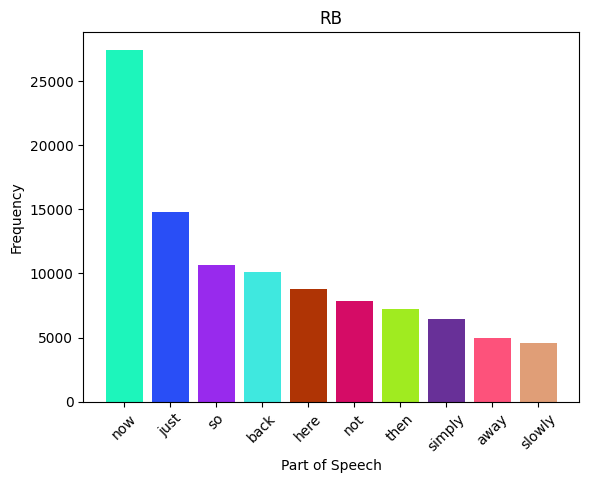

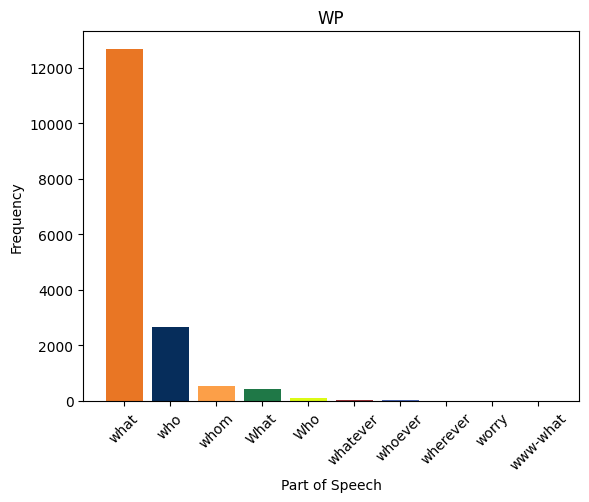

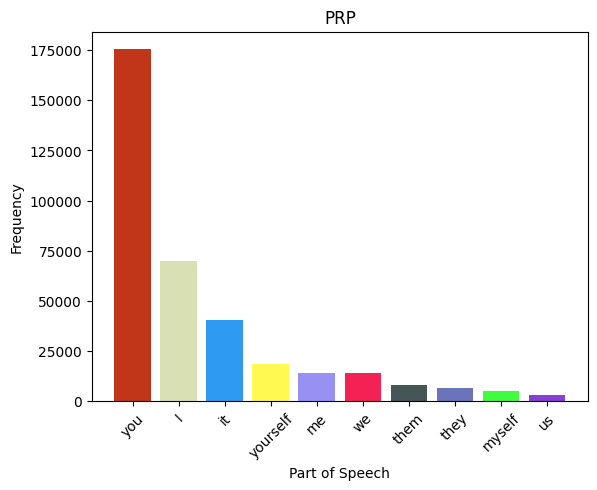

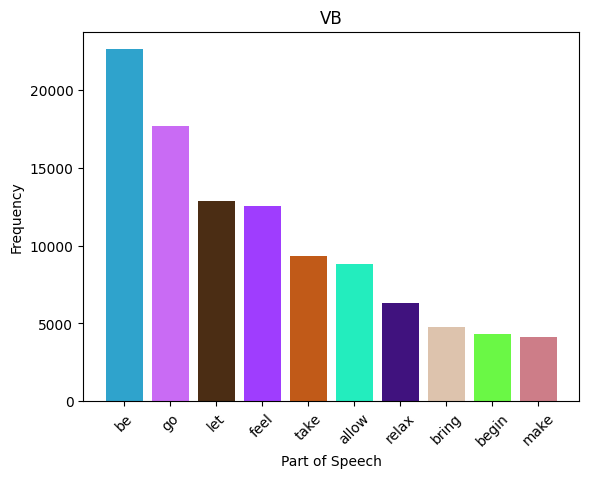

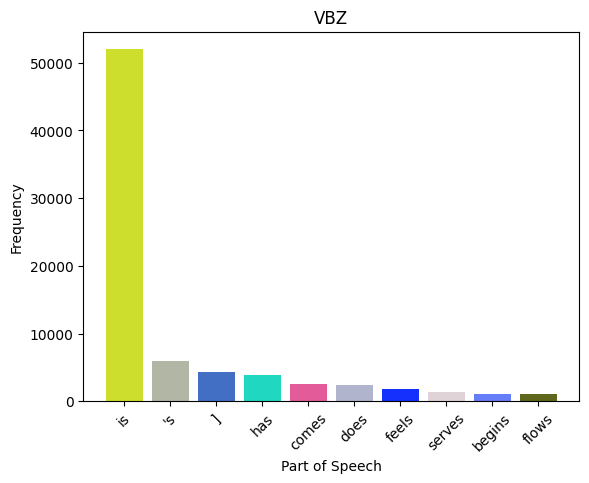

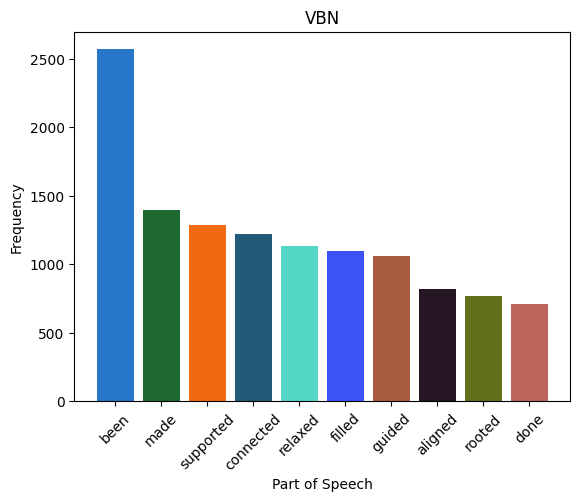

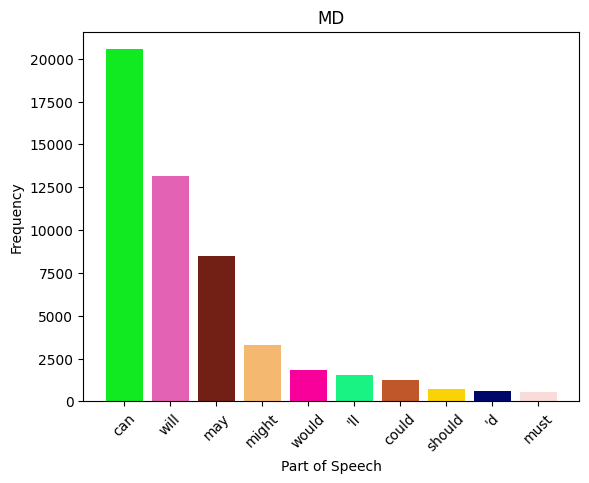

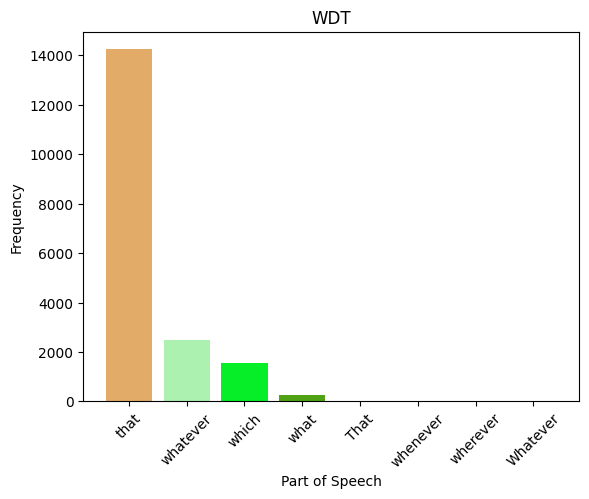

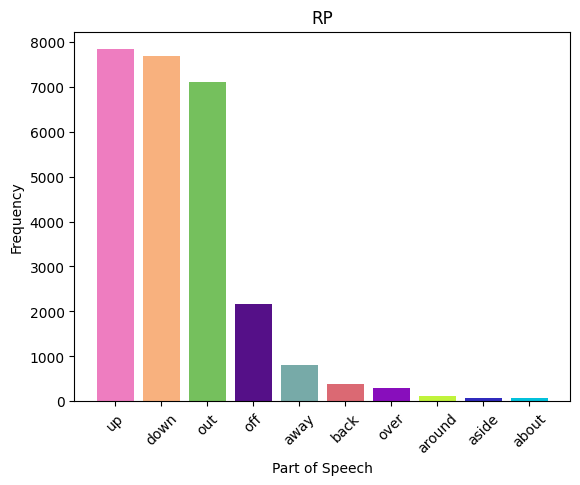

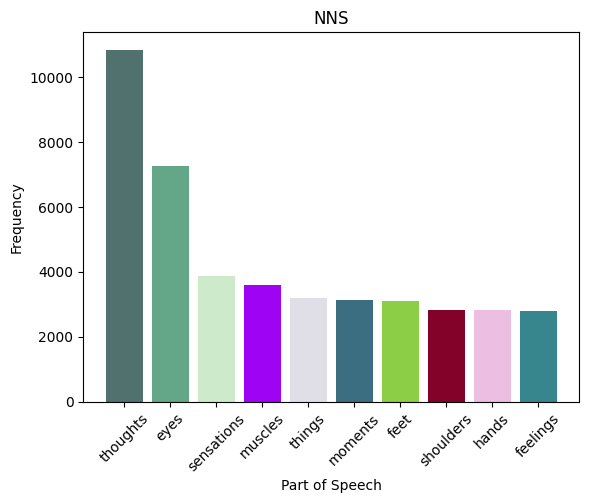

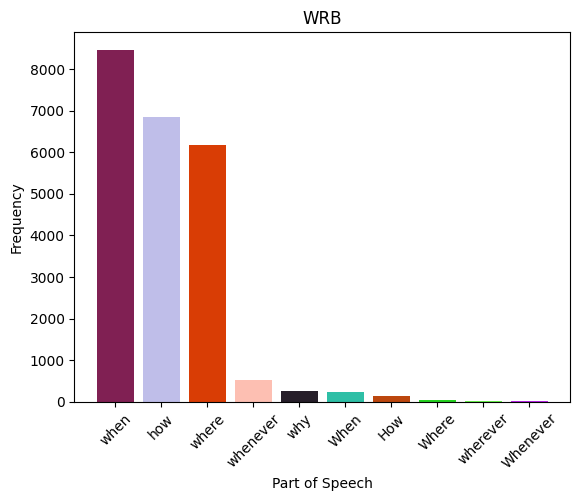

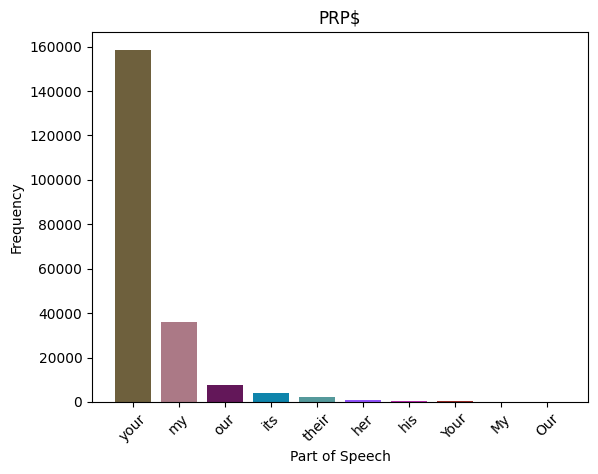

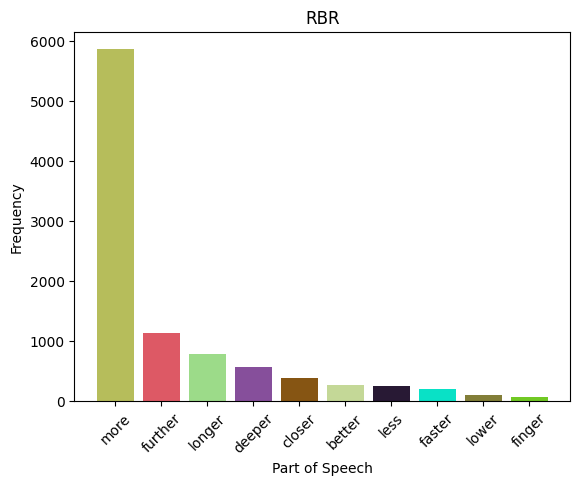

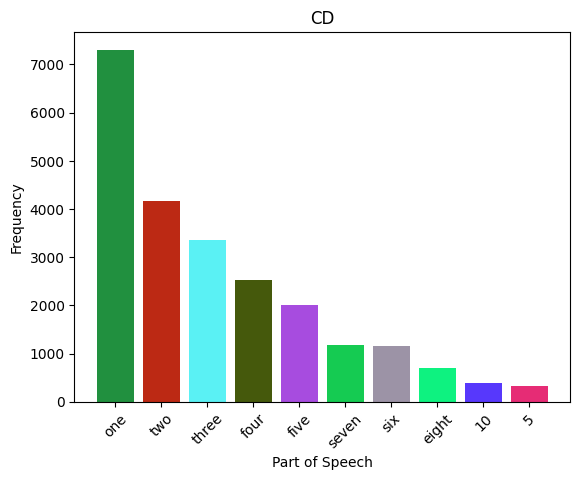

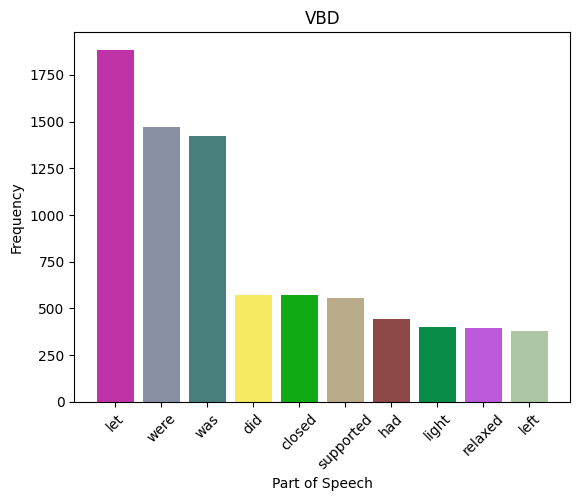

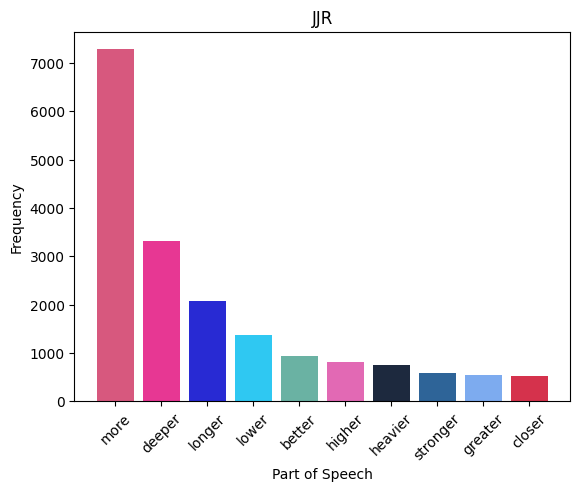

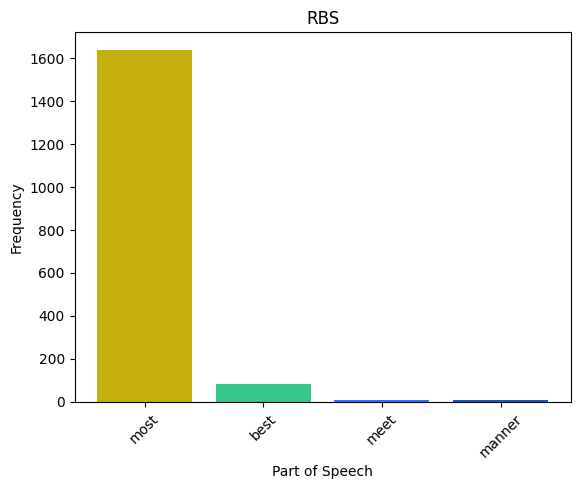

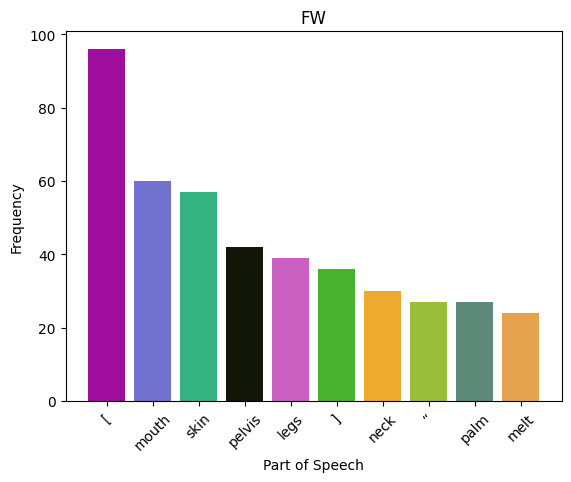

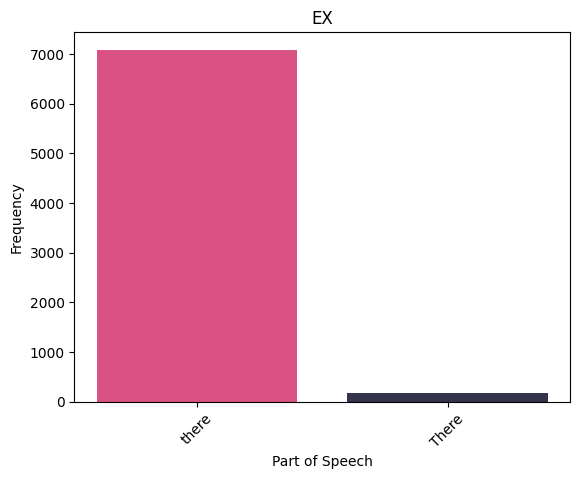

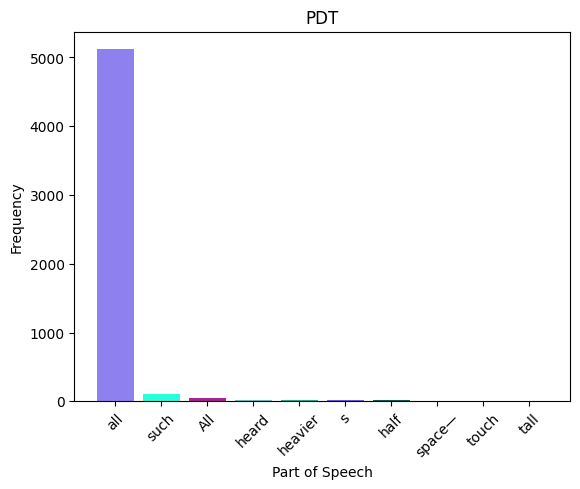

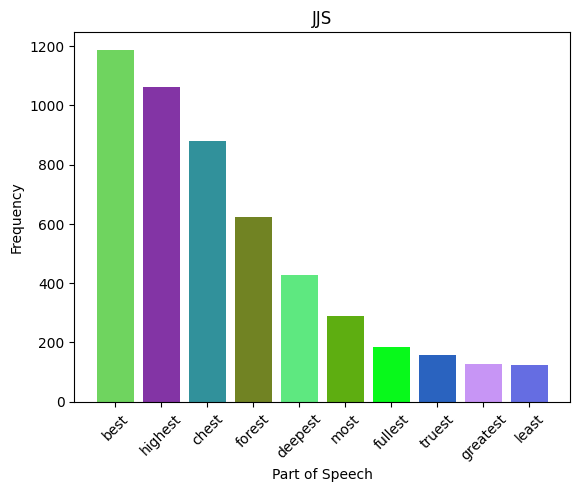

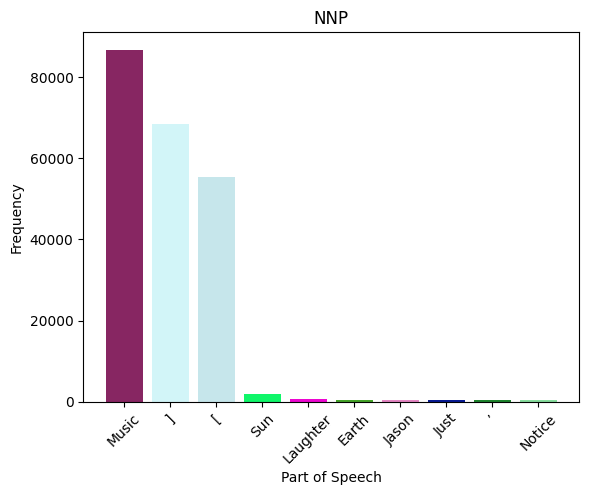

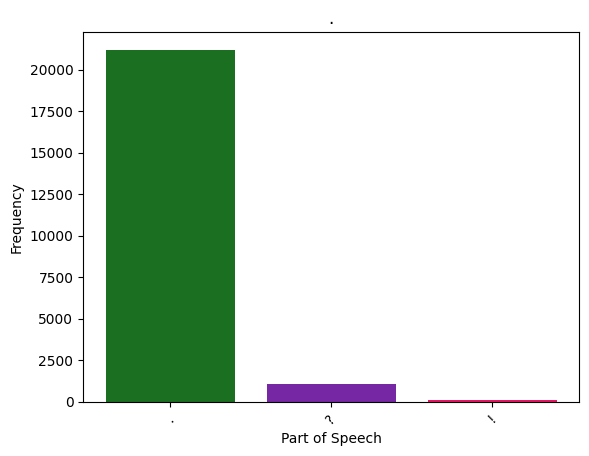

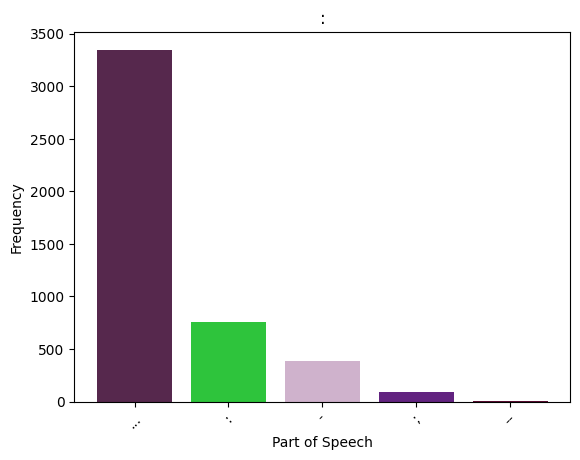

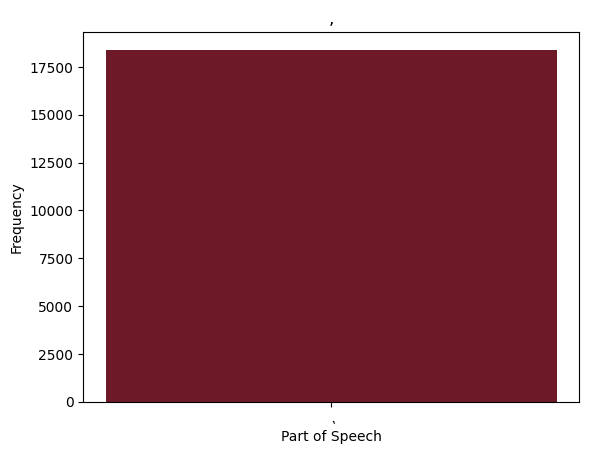

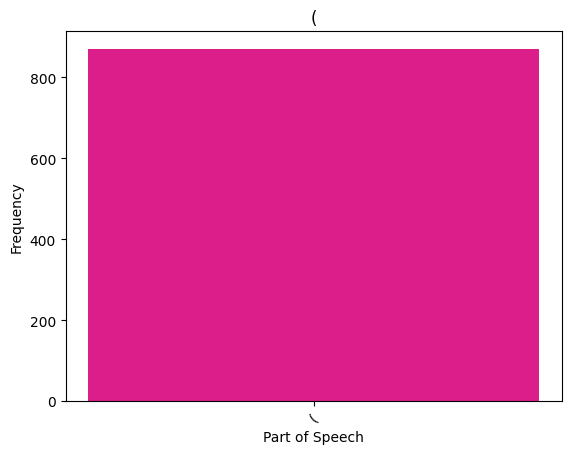

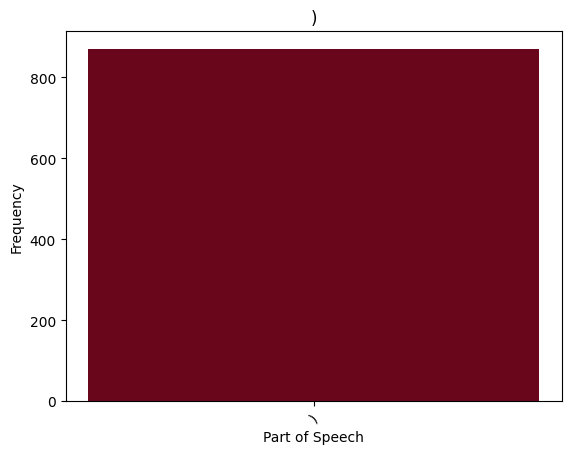

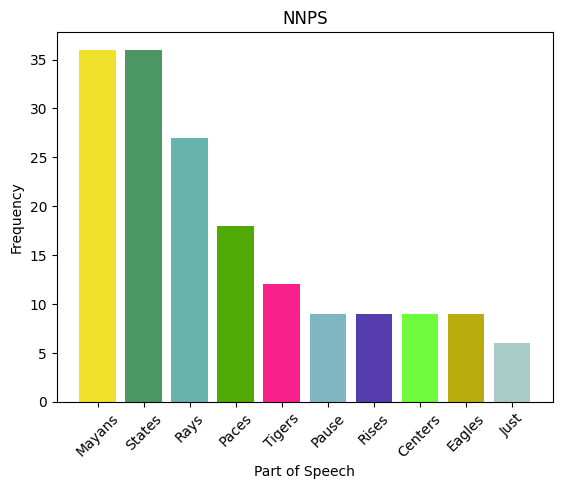

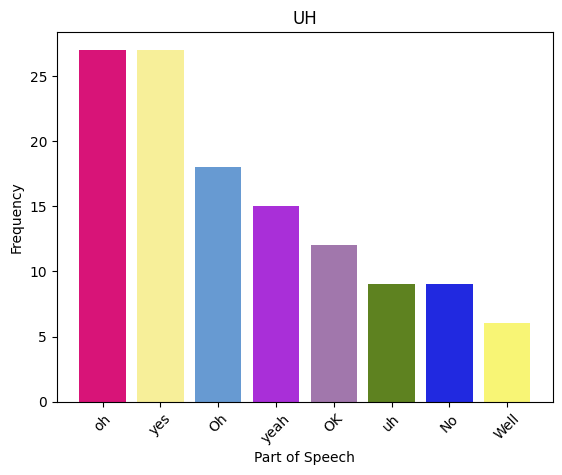

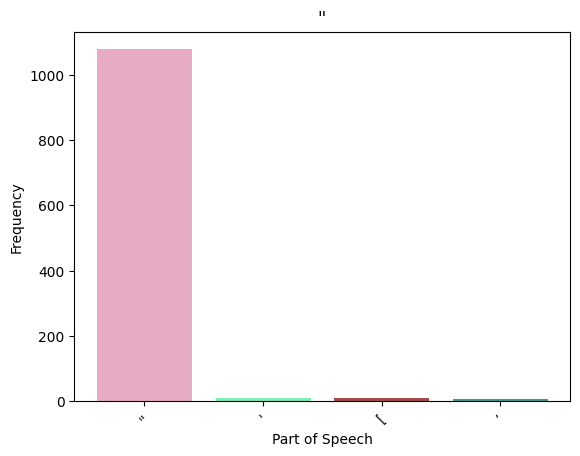

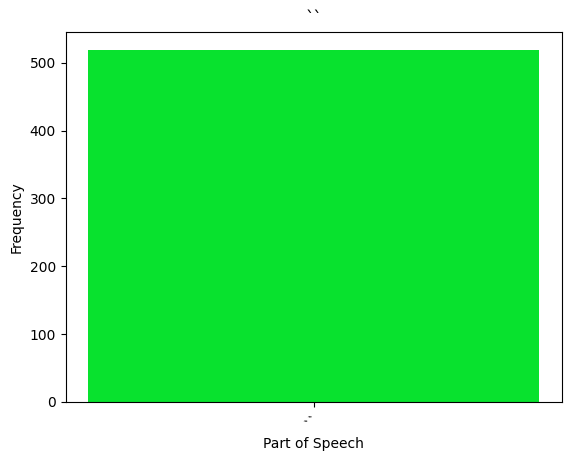

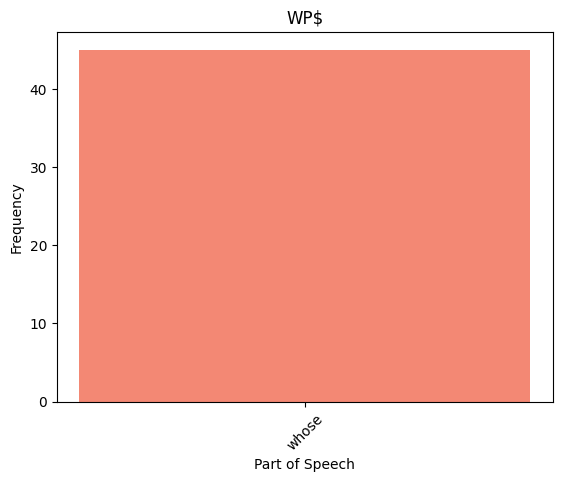

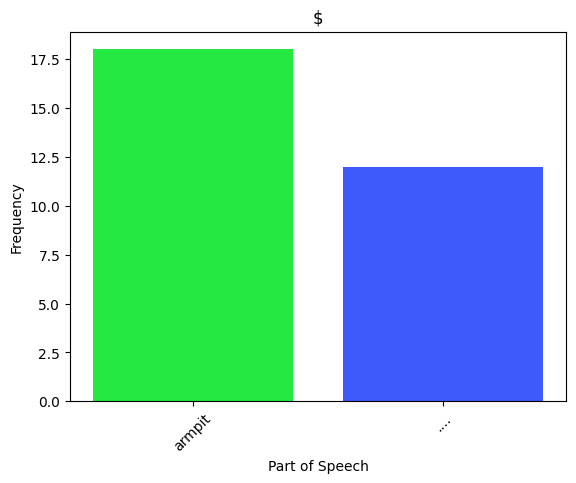

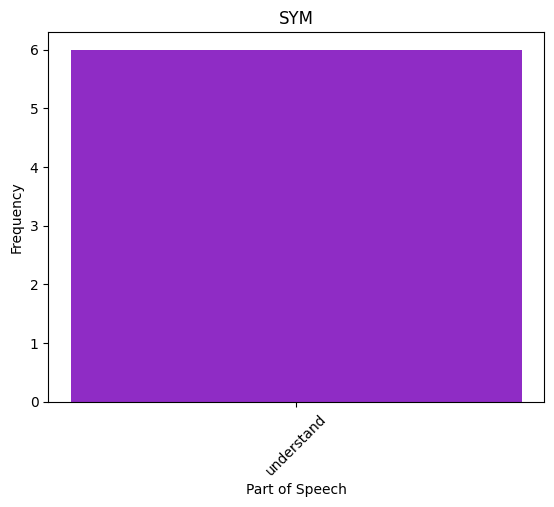

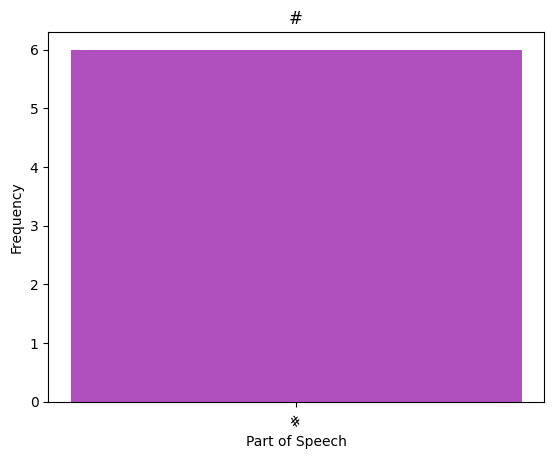

In [47]:
for key, value in top_pos_words.items():
    list_name = list()
    list_freq = list()
    for i in value:
        list_name.append(i[0])
        list_freq.append(i[1])
    fig = plt.figure()
    col = (np.random.random(), np.random.random(), np.random.random())
    plt.bar(list_name, list_freq, color=np.random.rand(len(counts),3))
    plt.xticks(rotation=45)
    plt.tick_params(labelsize=10)
    plt.xlabel("Part of Speech")
    plt.ylabel("Frequency")
    plt.title(key)
    plt.show()